**Parcial 2:**
1000319349

A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

In [88]:
import numpy as np
import pandas as pd
import datetime
from scipy import optimize

In [85]:
#load the dataset
df=pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")
df

,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


In [96]:
#polynomial that fits the data in the dataframe
cp=np.polyfit(df.hours, df.followers, 2) 
p=np.poly1d(cp) #polynomial
print("Interpolate polynomial:{}".format(p))
#to find the velocity, the polynomial is derived
d1p= p.deriv()
print("First derivate:{}".format(d1p))

Interpolate polynomial:           2
-0.002438 x + 8.552 x + 4.276e+04
First derivate: 
-0.004875 x + 8.552


In [98]:
#initial velocity(t=0)
print("Initial velocity is {} followers/hour".format(d1p(0)))

Initial velocity is 8.552137792664086 followers/hour


In [ ]:
#to find the aceleration, the polynomial is derived twice

In [101]:
d2p= d1p.deriv()
print("Aceleration is {} followers/hour^2".format(d2p))

Aceleration is  
-0.004875 followers/hour^2


In [103]:
#for the maximum number of followers must see when the speed at which they follow reaches zero (roots of d1p=v)
vr=optimize.newton(d1p,1000)
print("Velocity reaches zero at: {} ".format(vr))

Velocity reaches zero at: 1754.1931385698244 


In [105]:
#Critical point evaluated in the position equation to obtain the hours it would take to reach this x or number of followers.
ymax=p(vr)
print("The profile won't gain more followers in: {}".format(ymax))

The profile won't gain more followers in: 50262.136729011756


In [107]:
#The date this maximum is reached is
time=df.date_time[0] + datetime.timedelta(hours = ymax)
print('The date this maximum is reached is: {}'.format(time) )

The date this maximum is reached is: 2027-04-30 04:15:05.892442


B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate


In [15]:
def K_int(phi,m):
    """"
    Integrand for K(m,N) below. This defines the
    complete elliptic integral of the first kind
    """
    return 1.0/np.sqrt(1-m*np.sin(phi)**2)

def K(m,N=1000):
    """"
    K(m,N) computes the:
    complete elliptic integral with 2*N samples using integration rotine: integrate.quad    """
    return integrate.quad(K_int,0,np.pi/2, args=(m,))

In [70]:
saList=[] #small angle list
sqList=[] #scipy integrate.quad list

alpha_=np.linspace(0.0,90, 100,dtype="int") #range of alpha values

for alpha in alpha_:
    alphaRad=alpha*np.pi/180.0
    m=np.sin(alphaRad/2.0)**2
    qresult=K(m)
    smallAngle=(np.pi/2)*(1.0+m/4)
    sqList.append(2*qresult[0]/np.pi) #List for integration results
    saList.append(2*smallAngle/np.pi)
    
t_to=np.array(sqList) #numpy array for quotient T/T_0

In [83]:
#creating a Pandas DataFrame
df=pd.DataFrame(columns = ['Amplitud en grados', 'Amplitud en radianes','T/To'])
df['Amplitud en grados']=alpha_ #inserting a row 
df['Amplitud en radianes']=alpha_*np.pi/180.0
df['T/To']=t_to
df

,Amplitud en grados,Amplitud en radianes,T/To
0,0,0.000000,1.000000
1,0,0.000000,1.000000
2,1,0.017453,1.000019
3,2,0.034907,1.000076
4,3,0.052360,1.000171
...,...,...,...
95,86,1.500983,1.162214
96,87,1.518436,1.166617
97,88,1.535890,1.171105
98,89,1.553343,1.175679


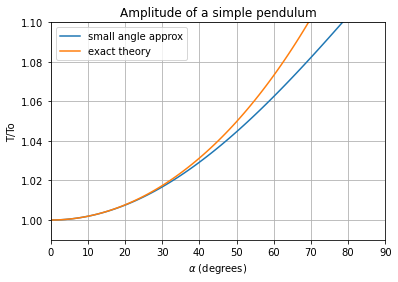

In [76]:
#plotting alpha vs T/To
plt.plot(alpha_,saList, label='small angle approx')
plt.plot(alpha_,t_to, label='exact theory')
plt.title("Amplitude of a simple pendulum")
plt.axis([0,90,0.99,1.1])
plt.xlabel("$\\alpha$ (degrees)")
plt.ylabel("T/To")
plt.grid()
plt.legend()
plt.show()